In [4]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [5]:

def load_nifti(file_path):
    return nib.load(file_path).get_fdata()

def visualize_slices(image_path, label_path, prediction_path, slice_idx=None):
    image = load_nifti(image_path)
    label = load_nifti(label_path)
    prediction = load_nifti(prediction_path)

    if slice_idx is None:
        slice_idx = image.shape[-1] // 2

    if label.ndim == 4:
        label = np.argmax(label, axis=0)
    if prediction.ndim == 4:
        prediction = np.argmax(prediction, axis=0)

    def class_distribution(arr):
        counts = np.bincount(arr.flatten().astype(int), minlength=3)
        return tuple(int(c) for c in counts)

    print("Label class distribution:", class_distribution(label))
    print("Prediction class distribution:", class_distribution(prediction))

    # Define class colors
    class_colors = ["blue", "green", "red"]
    class_labels = ["Background", "GTVp", "GTVn"]
    cmap = ListedColormap(class_colors)

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1, 1]})

    # MRI image
    axes[0].imshow(image[:, :, slice_idx], cmap="gray")
    axes[0].set_title("MRI Scan")
    axes[0].axis("off")

    # Ground Truth
    axes[1].imshow(image[:, :, slice_idx], cmap="gray")
    axes[1].imshow(label[:, :, slice_idx], cmap=cmap, alpha=0.5, vmin=0, vmax=2)
    axes[1].set_title("Ground Truth")
    axes[1].axis("off")

    # Prediction
    axes[2].imshow(image[:, :, slice_idx], cmap="gray")
    im_pred = axes[2].imshow(prediction[:, :, slice_idx], cmap=cmap, alpha=0.5, vmin=0, vmax=2)
    axes[2].set_title("Model Prediction")
    axes[2].axis("off")

    # Add colorbar in a separate axis
    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
    cbar = fig.colorbar(im_pred, cax=cbar_ax, ticks=[0, 1, 2])
    cbar.ax.set_yticklabels(class_labels)
    cbar.set_label("Class Index")

    plt.subplots_adjust(wspace=0.05)
    plt.show()




Label class distribution: (589824, 0, 0)
Prediction class distribution: (558291, 27446, 4087)


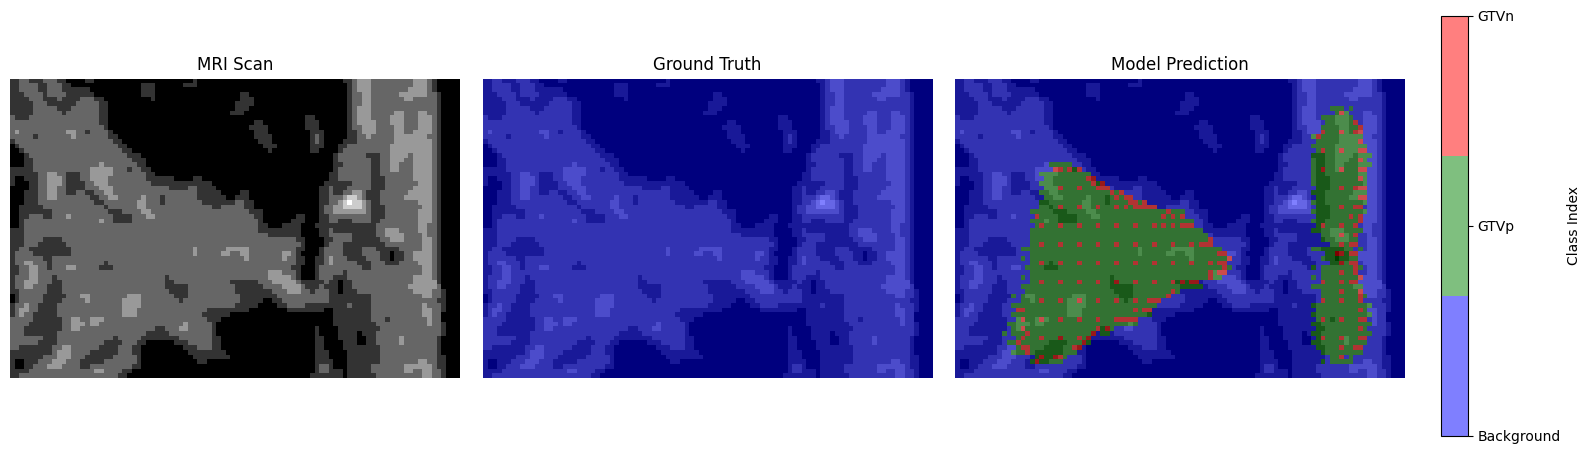

In [19]:
# Set file paths (adjust paths as needed)
image_path = "results/predictions/image_0.nii.gz"
label_path = "results/predictions/label_0.nii.gz"
prediction_path = "results/predictions/prediction_0.nii.gz"

# Visualize a specific slice (e.g., slice 50)
visualize_slices(image_path, label_path, prediction_path, slice_idx=50)